In [181]:
import sys
import pandas as pd
from datetime import date


In [233]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}customer_data.csv', low_memory=False, 
                     parse_dates=True, converters={'percentiles': eval, 'month': str, 'day': str})

In [234]:
df_raw

,month,day,domain_name,mean,percentiles
0,07,02,www.modernmusician.com.au,0.908183,"[0.008, 0.49999999999999994, 1.379, 2.90624999..."
1,07,02,www.impulseboutique.com.au,1.881467,"[0.944, 2.135, 2.634, 3.588, 4.999999999999999]"
2,07,02,www.brookys.com.au,0.674127,"[0.01, 0.546, 0.944, 2.013, 2.943]"
3,07,02,www.tecnisport.co.nz,0.837007,"[0.009, 0.025, 1.6, 2.448, 4.413]"
4,07,02,www.itsstore.com.au,0.571454,"[0.008, 0.012, 0.88, 2.01, 3.745]"
...,...,...,...,...,...
78854,07,03,shop.kidsrule.com.au,0.080000,"[0.007, 0.097, 0.106, 0.181, 0.181]"
78855,07,02,www.bevvebag.com,0.070500,"[0.007, 0.134, 0.134, 0.134, 0.134]"
78856,07,30,www.printpro.com.au,0.015500,"[0.01, 0.021, 0.021, 0.021, 0.021]"
78857,07,02,www.hinterlandrapidmanufacturing.com.au,0.093000,"[0.093, 0.093, 0.093, 0.093, 0.093]"


In [235]:
percentiles = df_raw.percentiles.apply(pd.Series)

percentiles = percentiles.rename(columns = {0: '25th', 1: 'median', 2: '75th',
                                            3: '95th', 4: '99th'}, 
                                            errors="raise")

df_raw = df_raw.join(percentiles, lsuffix='_caller', rsuffix='_other')



In [236]:
df_raw = df_raw.drop(columns=['percentiles'])

In [237]:
df_raw = df_raw.sort_values(by='month').sort_values(by='day')
df_raw['date'] = df_raw["month"].str.cat(df_raw["day"], sep ="/")

current_year = date.today().year

df_raw['date'] = df_raw['date'] + "/" + str(current_year)

df_raw['date'] = pd.to_datetime(df_raw['date'], errors='coerce')

In [238]:
df_plot = df_raw[df_raw['domain_name'] == "www.tumbarumbaoutfitters.com.au"]

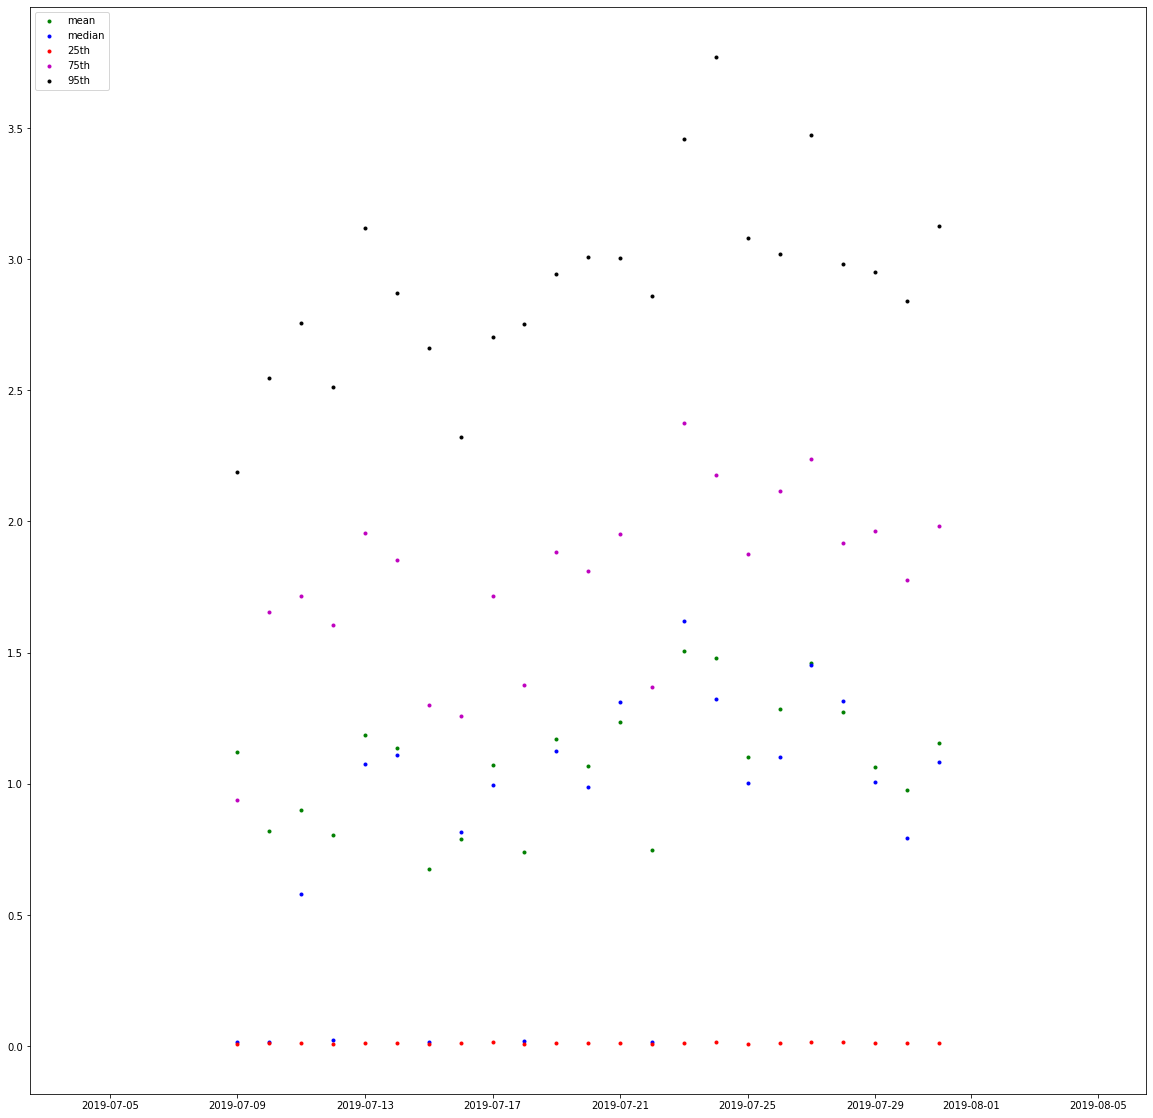

In [244]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.scatter(df_plot['date'],df_plot['mean'], c='g', marker='.', label='mean')
plt.scatter(df_plot['date'],df_plot['median'], c='b', marker='.', label='median')
plt.scatter(df_plot['date'],df_plot['25th'], c='r', marker='.', label='25th')
plt.scatter(df_plot['date'],df_plot['75th'], c='m', marker='.', label='75th')
plt.scatter(df_plot['date'],df_plot['95th'], c='k', marker='.', label='95th')
#plt.scatter(df_plot['date'],df_plot['99th'], c='y', marker='.', label='99th')

plt.legend(loc='upper left')
plt.show()

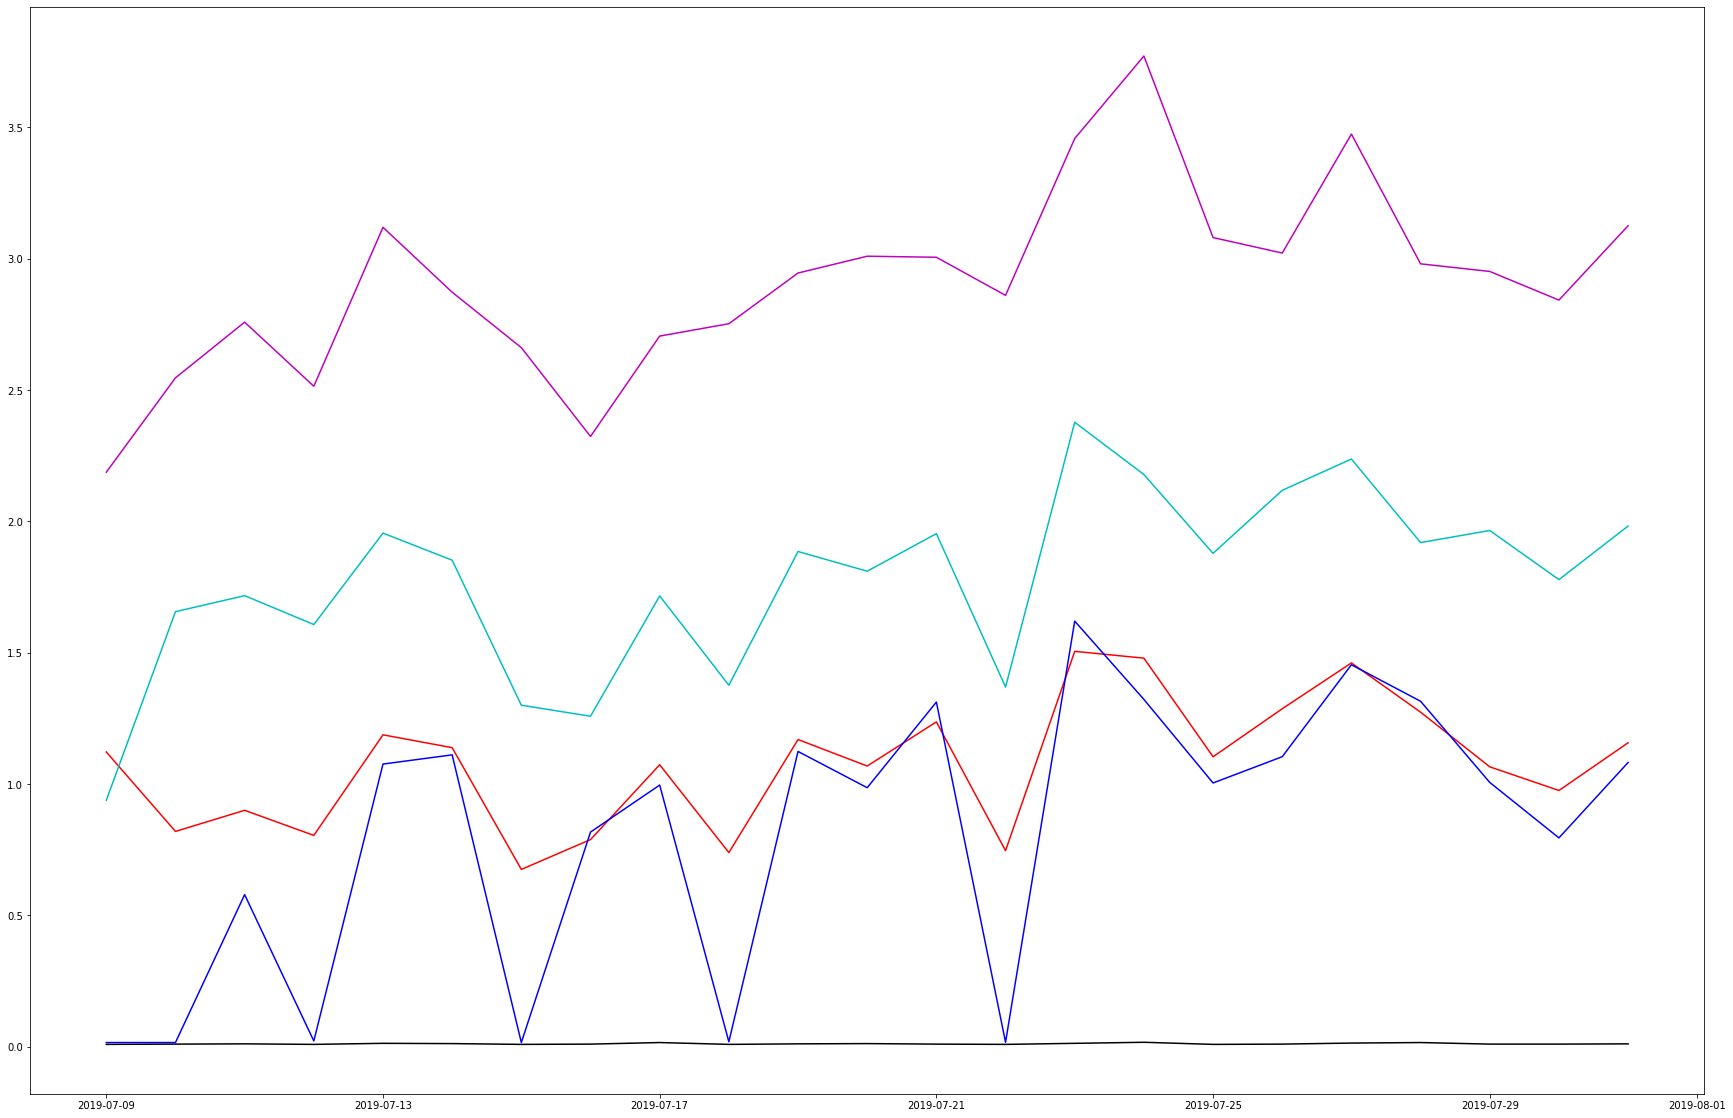

In [240]:
plt.figure(figsize=(30,20))
plt.plot(df_plot['date'], df_plot['mean'], 'r')
plt.plot(df_plot['date'], df_plot['median'], 'b')
plt.plot(df_plot['date'], df_plot['25th'], 'k')
plt.plot(df_plot['date'], df_plot['75th'], 'c')
plt.plot(df_plot['date'], df_plot['95th'], 'm')
#plt.plot(df_plot['date'], df_plot['99th'])